<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Gender Recognition
</font>
</h1>


![house price](https://www.istnetworks.com/wp-content/uploads/2022/03/instagram-reportedly-encourages-users-to-make-second-account_h241-768x432.jpg)

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Introduction and statement of the problem
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium">
<font face="vazir" size=3>
 Today, social networks have wide applications. Its first use is recreation and leisure. But from another point of view, social networks can be used to find behavioral patterns. For example, by analyzing the opinions of social network users, we can find the weaknesses of our business.
 <br>
 Gender is one of the influencing parameters in users' behavior. Faced with an issue, women will mostly react in one way and men in another way!
 <br>
 Now, in this exercise, we are going to predict their gender with the information that Datak has provided us from Twitter and Instagram users.
</font>
</p>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Import required libraries
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium">
<font face="vazir" size=3>
 First, import the libraries you need.
</font>
</p>

In [123]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Introduction to the dataset
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium">
<font face="vazir" size=3>
The training dataset has 8000 rows and 10 columns. In the table below, more information is written about the data.
</font>
</p>

<center>
<div dir=ltr style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

|Column|Description|
|:------:|:---:|
|gender|gender (target column)|
|age|user's age range|
|fullname|the name written in the social network profile |
|username|username|
|biography|biography of the user's social network|
|follower_count|The number of followers of the user|
|following_count|The number of people who follow the user|
|is_business|the business nature of the user account|
|is_verified|verified user account|
|is_private|privacy of user account|

</font>
</div>
</center>


<p dir=ltr style="direction: ltr; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium">
<font face="vazir" size=3>
 The <code>age</code> column is not a continuous variable; Rather, it shows the age groups. In the table below, we see how age is mapped.
</font>
</p>


<center>
<div dir=ltr style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

|Real age of users|Mapped number|
|:------:|:---:|
|1|Less than 18 years old|
|2|From 19 to 29 years|
|3|from 30 to 40 years|
|4|above 40 years|

</font>
</div>
</center>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Reading the dataset
</font>
</h2>

<p style="direction: ltr; text-align: justify; line-height: 200%; font-family: vazir; font-size: medium">
<font face="vazir" size=3>
 First, you need to read the dataset files. The training samples are stored in the <code>train_data.csv</code> file and the test samples whose class you need to predict are stored in the <code>test_data.csv</code> file. If you consider it necessary, you can also separate part of the training data as validation data.
</font>
</p>

In [124]:
train = pd.DataFrame(pd.read_csv('train_data.csv'))
test = pd.DataFrame(pd.read_csv('test_data.csv'))

In [125]:
train

,gender,age,fullname,username,biography,follower_count,following_count,is_business,is_verified,is_private
0,man,2,Farshid,mr_gh_farshid,دردا ک در این بادیه بسیار دویدیم...\nGlory man...,1604.0,1407.0,0.0,0.0,0.0
1,woman,2,zahr@72,zahra.roozbahani72,"خواهی که زکوچ در امان برگردی\nباید که به جان ,...",67.0,501.0,0.0,0.0,0.0
2,woman,2,ms farahnaz♥,___lady.farahnazi.__,"Having you, is all I wish for \nداشتنت، تمامِ...",0.0,0.0,0.0,0.0,0.0
3,woman,1,Lena.mommy farzan,mommy.lena3361,دردونه من لنا کوچولو,0.0,0.0,0.0,0.0,0.0
4,woman,2,Narsis Asadollahi,_l.aurora.l_,I am an animation student\n🎧🎼🎨⚓️🤍 \n@general.m...,200.0,328.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7995,woman,2,Ŋεgɨŋ,negiiin_bahrmandi,﷽\nAllah IS Enough FoR Me?\n♥️?,0.0,0.0,0.0,0.0,0.0
7996,man,3,h🗯abdi🗯offìcial,h.abdi.official,حقوقی,0.0,0.0,1.0,0.0,0.0
7997,woman,2,⚜رویا احمدی⚜,roya.ahmadi.k,مهندس صنایع👩‍🔧🏭 Industrial engineer\nمعمار👩‍💻👷...,1260.0,1167.0,0.0,0.0,0.0
7998,man,3,لرستان &خرم اباد,erfanpouersif,khoramabad,0.0,0.0,0.0,0.0,0.0


<h2 align=ltr style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Preprocessing and feature engineering
</font>
</h2>

### 🔴 Check all pages on Instagram

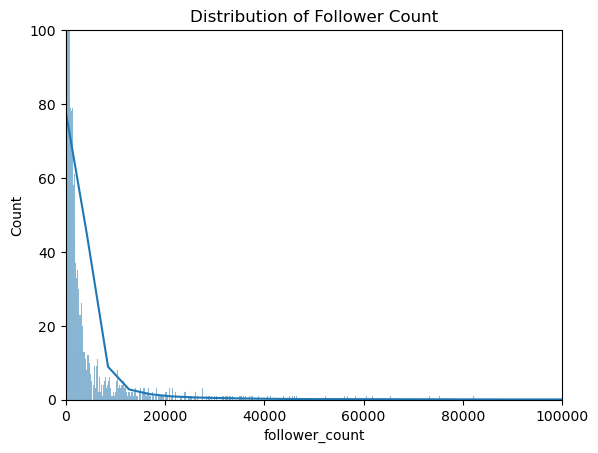

In [126]:
sns.histplot(train['follower_count'], kde=True)
plt.title('Distribution of Follower Count')
plt.ylim(0, 100)
plt.xlim(0, 100000)
plt.show()

This graph shows the distribution of the number of followers (`follower_count`). Some important points that can be extracted from this chart:

1. **Uneven distribution (Skewness)**:
 - This graph is heavily skewed to the left (skewed to the right), meaning that most users have low follower counts and only a very few users have very high follower counts. This is not a normal distribution and is indicative of a concentration of users with low followers and a small number of users with very large followers.

2. **high concentration in small amounts**:
 - The majority of the data is concentrated in a very small range of follower numbers (between 0 and about 2000 followers). This shows that most of the users are in this range of followers.

3. **Long Tail**:
 - The graph shows a long tail to the right, indicating that there are a small number of users with a very large number of followers (over 20,000). These users can be famous people or brands that have a large number of followers.

4. **Outliers**:
 - Some users have a very high number of followers, which can be seen as outliers at the tail end of the graph.

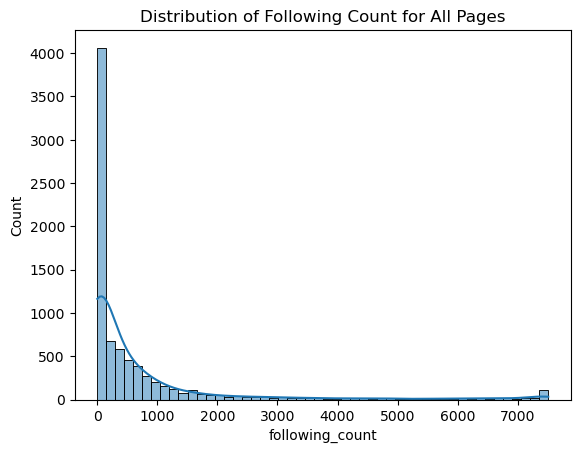

In [127]:
sns.histplot(train['following_count'], bins=50, kde=True)
plt.title('Distribution of Following Count for All Pages')
plt.show()

This graph shows the distribution of the number of followers (`following_count`) among all pages. The analysis of this chart is as follows:

1. **Uneven distribution and skewness**:
 - This graph, like the graph of the number of followers, is strongly skewed to the right. This skew indicates that most users follow a small number of other pages, while a small number of users follow a very large number of pages.

2. **Focus on small amounts**:
 - Most of the data is concentrated in smaller ranges (0 to 1000), so that the majority of users follow less than 1000 pages. There is a very tall column at the beginning (close to zero) indicating a large number of users with very few followers.

3. **Long Tail**:
 - The tail of the graph is stretched to the right, indicating a small number of users who follow a very large number of pages (up to more than 7000 pages). This indicates that there are few users who have very high following activity.

4. **Outliers**:
 - The presence of data on the right side of the graph that is far away from most of the data indicates the presence of outliers. These outliers indicate users or accounts that have a very high number of followers.

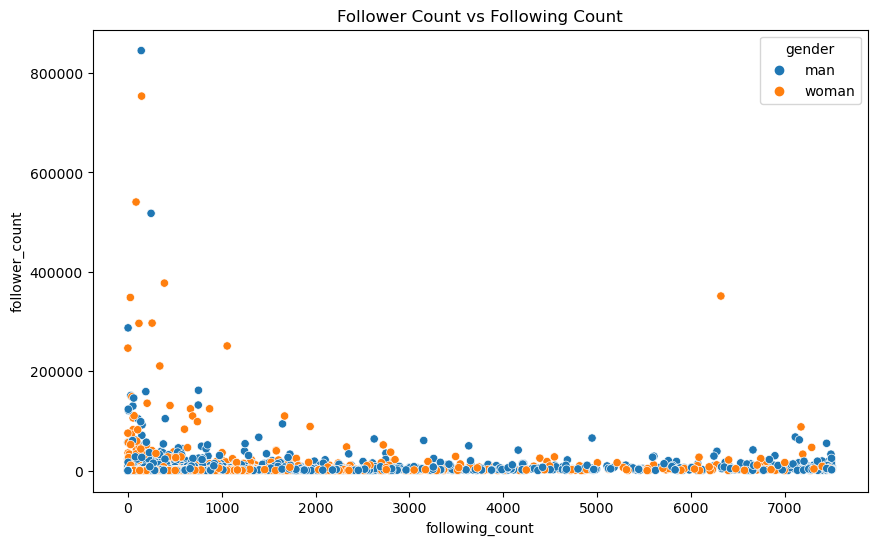

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='following_count', y='follower_count', hue='gender', data=train)
plt.title('Follower Count vs Following Count')
plt.show()

This scatter plot shows the relationship between the number of followers (`follower_count`) and the number of followers (`following_count`) for two genders (male and female). The analysis of this chart is as follows:

1. **general data distribution**:
 - Most of the data points are concentrated in the bottom left of the graph, indicating low number of followers and unfollowed for most users. This usually means in social networks that most users only follow a small number of pages and have fewer followers themselves.

2. **Outliers**:
 - In the graph, there are several points that are separated from the rest of the data and are located as scattered points on the top of the graph. These dots represent users or accounts that have a very large number of followers or followers. These points may include popular accounts or advertising pages.

3. **Comparison of genders**:
 - The blue and orange dots, representing men and women respectively, are generally scattered throughout the chart. This scatterplot shows that both genders are similarly distributed and there is no significant difference in the number of followers and followers between genders.
 - Of course, in the places where the number of followers and followers are very high, both genders are visible, which indicates that gender does not have a great effect on the amount of following and being followed at high levels.

4. **Focus on the bottom axes**:
 - Most of the points are concentrated near the lower axes of the graph, which indicates that many users have few followers and following. This state may be due to the normal use of social networks by users.

### Conclusion:
- **Variety in users**: The graph shows that in social networks, users are very diverse in terms of the number of followers and followers, but the majority of them are concentrated in the lower ranges.
- **Outlier analysis**: A more detailed analysis of outliers can help identify specific users, such as influencers or business pages.
- **No significant gender difference**: In this data sample, no significant difference between genders is observed in the amount of following and being followed.

These analyzes can help you better understand the behavior of users in social networks and adopt more appropriate strategies to manage and promote your pages.

In [129]:
data_dict =dict(train['follower_count'].value_counts())
df_followers = pd.DataFrame(list(data_dict.items())[1:], columns=['Followers', 'Counts'])
df_followers

,Followers,Counts
0,213.0,13
1,189.0,12
2,145.0,12
3,175.0,12
4,120.0,11
...,...,...
2471,8381.0,1
2472,6166.0,1
2473,442.0,1
2474,21561.0,1


This table shows the number of followers (`Followers`) and the number of users with that number of followers (`Counts`). The analysis of this table is as follows:

### Analysis of the columns:

1. **`Followers`**:
 - This column shows the number of users' followers. The values ​​in this column start at 213.0 and continue up to 21,561.0 respectively.
 - The number of followers in this data is very diverse and ranges from a few hundred followers to tens of thousands of followers.

2. **`Counts`**:
 - This column shows the number of users who have exactly the same number of followers.
 - For example, 13 users have 213 followers, 12 users have 189 followers, and 12 users have 145 followers.

### Key observations:

1. **A large number of users with similar followers**:
 - The maximum number of users with followers is between 100 and 200 people. This shows that a large number of users have followers in this range. For example, 13 users have 213 followers and 12 users have 189 followers.
 - This shows that it is common among users to have a relatively low number of followers.

2. **Users with high and less common followers**:
 - As the number of followers increases, the number of users decreases with this number of followers. For example, only one user has 8,381 followers and also only one user has 21,561 followers.
 - This shows that having high followers is a rare feature among users.

3. **dispersion of values**:
 - The data is widely scattered, meaning that some users have much more followers than others. This may be due to differences in the level of fame, activity or use of social networks.

### Conclusion:

- **Focus on low followers**: A large number of users have followers between 100 and 200, which indicates that most users are in this range.
- **High followers are rarely seen**: As the number of followers increases, the number of users in that range decreases. This shows that the number of users with high followers is rare.
- **Importance of users with high followers**: Although users with high number of followers are few, these users can have more influence in social networks and should be carefully considered.

In [130]:
data_dicts =dict(train['following_count'].value_counts())
df_following = pd.DataFrame(list(data_dicts.items())[1:], columns=['Following', 'Counts'])
df_following

,Following,Counts
0,197.0,13
1,7500.0,13
2,7499.0,13
3,199.0,11
4,268.0,10
...,...,...
2049,1022.0,1
2050,822.0,1
2051,2217.0,1
2052,1070.0,1


This table contains two columns: `Following' and `Counts'. The analysis of each of these columns and related data is as follows:

### Analysis of the columns:

1. **`Following'**:
 - This column shows the number of pages that users follow (that is, the number of followings).
 - ``Following'' values ​​in this column start from 197.0 and continue to 7500.0.

2. **`Counts`**:
 - This column shows the number of users who have exactly the same number of followers.
 - For example, 13 users have 7500 followers, another 13 users have 197 followers, and 13 users have 7499 followers.

### Key observations:

1. **A large number of users with a high number of followers**:
 - The largest number of users (13 people) have 7500 and 7499 followers. This could indicate that some users have reached or are close to the maximum possible capacity for following. Many social networks have limits on the number of pages one can follow, and 7,500 may be close to the limit.
 - Also, 13 other users have a follow count of 197, indicating that lower follow counts are also relatively common.

2. **dispersion of values**:
 - The data is widely scattered, meaning that a large number of users have different numbers of followers, ranging from 197 to 7,500.
 - As the number of followers decreases, the number of users also decreases with that number of followers. For example, only one user has 2217 followers and another user has 1726 followers.

3. **number of users with less followings**:
 - Unlike users with very high number of followers (such as 7500), many users have lower number of followers, indicating an unbalanced distribution.
 Users with fewer followers are likely to be more cautious or naturally follow fewer pages.

### Conclusion:

- **Focus on high followings**: A large number of users have the maximum or close to the maximum possible number of followers (eg 7500 and 7499), indicating that these users are highly active on social networks and follow a large number of pages. .
- **Dispersion and diversity in the number of followings**: There is a great diversity in the number of followings, which can indicate the behavioral differences of users in social networks.
- **Users with fewer followers**: Users with fewer followers are also present in significant numbers, which may indicate a more selective approach to following pages.

C:\Users\peyman\AppData\Local\Temp\ipykernel_18480\3136798764.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  sns.heatmap(train.corr(), annot=True, cmap='coolwarm')


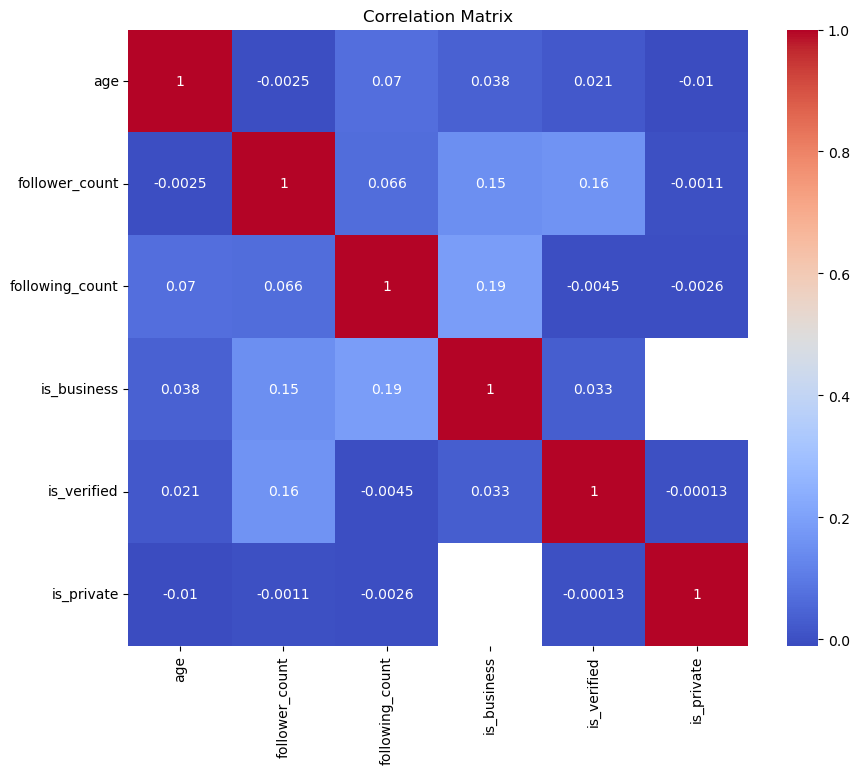

In [131]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The presented table shows the correlation between different variables related to user accounts. This correlation analysis helps you understand the linear relationships between variables. In summary:

### Correlation analysis:

1. **`gender` (gender):**
 - It has a negative correlation with `age' (-0.379), which may indicate that women or men are generally younger or older in the data.
 - The close to zero correlation with `follower_count` and `following_count` indicates that gender does not have a significant effect on the number of followers or the number of followed.

2. **`age` (age):**
 - It has a very weak negative correlation with `follower_count` (-0.002) and a weak positive correlation with `following_count` (0.070).
 - This shows that increasing age has little effect on the number of followers and may be slightly associated with an increase in the number of followers.

3. **`follower_count` (number of followers):**
 - has a stronger positive correlation with ``is_verified'' (0.162) and ``is_business'' (0.150). This makes sense because verified and business accounts usually have more followers.
 - The weak positive correlation with `following_count' (0.066) indicates that accounts with more followers have slightly more followers.

4. **`following_count` (number of followers):**
 - It has a relatively weak positive correlation with `is_business' (0.189), which may indicate that business accounts are more likely to follow other pages.
 - The weak positive correlation with `hashtags_count' (0.077) also indicates more use of hashtags by these accounts.

5. **`is_business` (is the account business):**
 - It has a positive correlation with `follower_count` (0.150) and `following_count` (0.189), which indicates that business accounts have more followers and followed.
 - The positive correlation with `hashtags_count' (0.151) shows that business accounts use more hashtags.

6. **`is_verified` (is the account verified):**
 - has a positive correlation with follower_count (0.162), indicating that verified accounts tend to have more followers.

7. **`follower_to_following_ratio` (ratio of follower to followed):**
 - has a positive correlation with follower_count (0.257), indicating that accounts with more followers have a higher follower-to-followed ratio.

8. **`hashtags_count` (number of hashtags):**
 - It has a weak positive correlation with `follower_count` (0.046) and `following_count` (0.077), which may indicate that the use of hashtags is related to increasing the number of followers and being followed.

### Key points:

- **Business and verified accounts:** These accounts generally have more followers and this is clearly evident in the positive correlations with `follower_count'.
- **Weak relationship between age and other variables:** The correlation of age with the number of followers and followed is very weak, which shows that age does not have a great effect on these characteristics.
- **Relationship between gender and age:** There is a significant negative correlation between gender and age, but it is not strongly related to other variables.

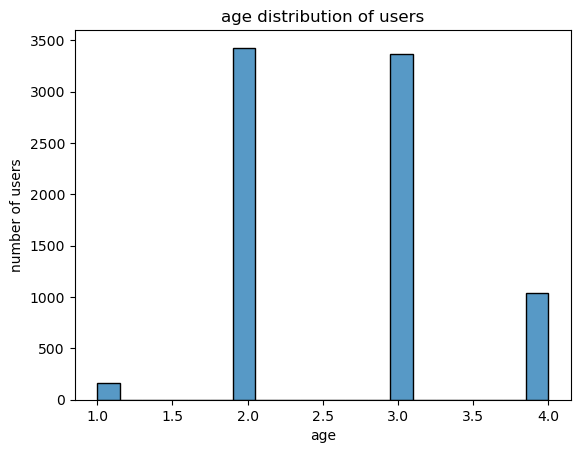

In [132]:
sns.histplot(data=train, x='age', bins=20)
plt.title('age distribution of users')
plt.xlabel('age')
plt.ylabel('number of users')
plt.show()


This histogram shows the age distribution of users. Here, each column represents the number of users in a certain age group.

### Chart Analysis:

1. **20 and 30 age group (the most populated groups):**
 - The largest number of users are in the age groups of 20 and 30, each of which is about 3500 people. This indicates that these age groups (which may represent certain ages) are highly popular in this data.

2. **Age group 4 (smaller population):**
 - The age group of 40 is relatively smaller and includes about 1000 people. This may indicate older or younger users who are less active.

3. **Age group 10 (the least number of users):**
 - This age group has the lowest number of users, which is less than 500 people. This can indicate a very young or very old age group.

### Conclusion:

This graph shows that the majority of users are in the age groups of 20 and 30, and most likely these groups represent middle-aged people. The less populated age groups of 10 and 40 may be younger or older users. This distribution shows that users are mostly at an age where they are likely to be more comfortable using social networks and technology.

In [222]:
gender_business_count.values

array([[3475,  524],
       [3696,  302]], dtype=int64)

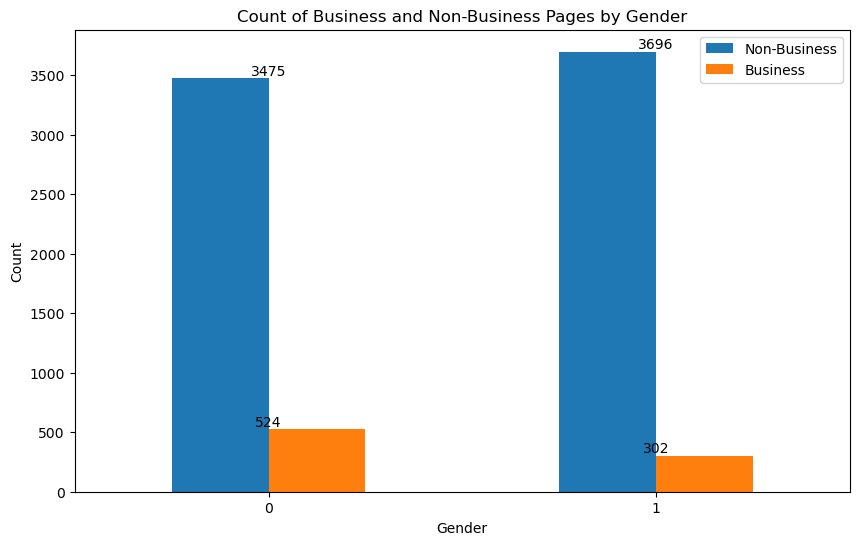

In [224]:
gender_business_count = train.groupby(['gender', 'is_business']).size().unstack()


gender_business_count.plot(kind='bar', figsize=(10, 6))
for i in range(gender_business_count.shape[0]):
    for j in range(gender_business_count.shape[1]):
        plt.text(i, gender_business_count.values[i, j] + 0.5, str(round(gender_business_count.values[i, j], 4)), ha='center', va='bottom')
plt.title('Count of Business and Non-Business Pages by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Non-Business', 'Business'])
plt.show()

Here’s how to interpret the data:

### Summary Table Breakdown

#### **Business Accounts (is_business = 1.0):**
- **Men:** 524 accounts
- **Women:** 302 accounts

#### **Non-Business Accounts (is_business = 0.0):**
- **Men:** 3,475 accounts
- **Women:** 3,696 accounts

### Observations

1. **Business Accounts:**
   - Men have more business accounts (524) compared to women (302).
   
2. **Non-Business Accounts:**
   - Women have a slightly higher number of non-business accounts (3,696) compared to men (3,475).

### Additional Insights

- **Overall Trends:**
  - The majority of accounts for both genders are non-business accounts.
  - The proportion of business accounts is relatively small compared to non-business accounts.
  
- **Gender Comparison:**
  - Men are more likely to have a business account compared to women in this dataset.

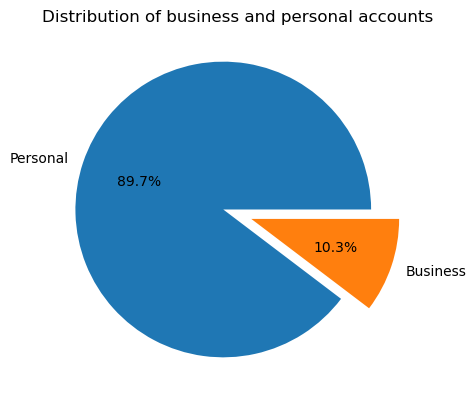

In [134]:
explode = (0.1,0.1)
plt.pie(train['is_business'].value_counts(), labels=['Personal', 'Business'], autopct='%1.1f%%',explode=explode)
plt.title('Distribution of business and personal accounts')
plt.show()


According to new information:

- **Number of non-business accounts (is_business = 0.0):** 7,171 accounts
- **Number of business accounts (is_business = 1.0):** 826 accounts

### Analysis

1. **Total number of accounts:**
 - **Non-commercial accounts:** 7,171 accounts (more than the number of commercial accounts)
 - **Commercial accounts:** 826 accounts (less than the number of non-commercial accounts)

2. **The ratio of commercial to non-commercial accounts:**
 - Non-commercial accounts are significantly more than commercial accounts.
 - The ratio of commercial to non-commercial accounts is about 11.5%.

3. **Overall trend:**
 - The majority of accounts appear to be used for personal purposes and less than 15% of accounts are commercial.

### Comparison with previous data

With the previous data that showed the division based on gender, it can be said that:

- The number of commercial accounts is less than the number of non-commercial accounts.
- The number of male (524) and female (302) business accounts totals 826, which is generally consistent with the total number of business accounts (826).

If you need more analysis or details, please let me know!

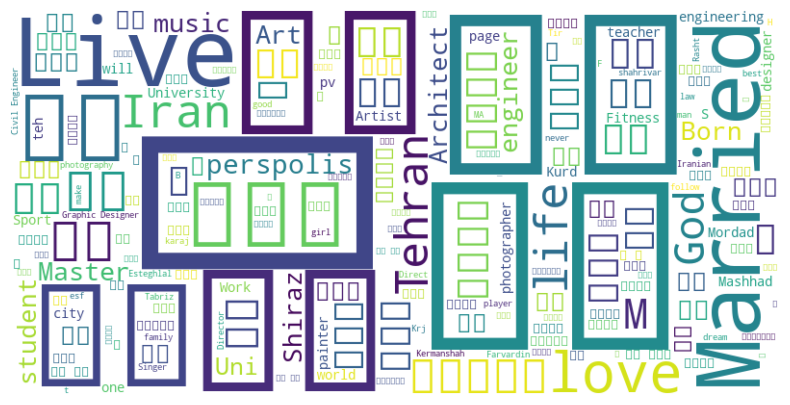

In [135]:
from wordcloud import WordCloud


text = " ".join(biography for biography in train.biography.dropna())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 🔴 Checking business pages

In [136]:
is_bussines=train[train['is_business'] == 1]

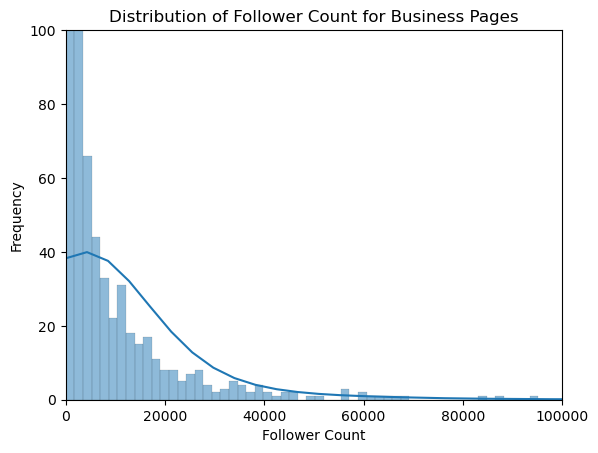

In [137]:
sns.histplot(is_bussines['follower_count'], kde=True)
plt.title('Distribution of Follower Count for Business Pages')
plt.xlabel('Follower Count')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.xlim(0, 100000)
plt.show()


This graph shows the distribution of the number of followers (`follower_count`). Some important points that can be extracted from this chart:

1. **Uneven distribution (Skewness)**:
 - This graph is heavily skewed to the left (skewed to the right), meaning that most users have low follower counts and only a very few users have very high follower counts. This is not a normal distribution and is indicative of a concentration of users with low followers and a small number of users with very large followers.

2. **high concentration in small amounts**:
 - The majority of the data is concentrated in a very small range of follower numbers (between 0 and about 2000 followers). This shows that most of the users are in this range of followers.

3. **Long Tail**:
 - The graph shows a long tail to the right, indicating that there are a small number of users with a very large number of followers (over 20,000). These users can be famous people or brands that have a large number of followers.

4. **Outliers**:
 - Some users have a very high number of followers, which can be seen as outliers at the tail end of the graph.

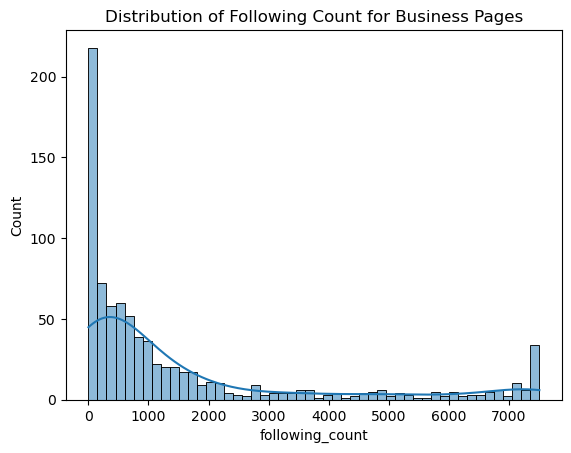

In [138]:
sns.histplot(is_bussines['following_count'], bins=50, kde=True)
plt.title('Distribution of Following Count for Business Pages')
plt.show()

This graph shows the distribution of the number of followers (`following_count`) among all pages. The analysis of this chart is as follows:

1. **Uneven distribution and skewness**:
 - This graph, like the graph of the number of followers, is strongly skewed to the right. This skew indicates that most users follow a small number of other pages, while a small number of users follow a very large number of pages.

2. **Focus on small amounts**:
 - Most of the data is concentrated in smaller ranges (0 to 1000), so that the majority of users follow less than 1000 pages. There is a very tall column at the beginning (close to zero) indicating a large number of users with very few followers.

3. **Long Tail**:
 - The tail of the graph is stretched to the right, indicating a small number of users who follow a very large number of pages (up to more than 7000 pages). This indicates that there are few users who have very high following activity.

4. **Outliers**:
 - The presence of data on the right side of the graph that is far away from most of the data indicates the presence of outliers. These outliers indicate users or accounts that have a very high number of followers.

In [139]:
data_dict =dict(is_bussines['follower_count'].value_counts())
df_followers = pd.DataFrame(list(data_dict.items())[1:], columns=['Followers', 'Counts'])
df_followers

,Followers,Counts
0,1726.0,2
1,1402.0,2
2,1813.0,2
3,2028.0,2
4,1009.0,2
...,...,...
663,694.0,1
664,2248.0,1
665,5835.0,1
666,1652.0,1


Given that the data is for business accounts, we can perform a specific analysis on the number of followers for these accounts. In this data, the ``Followers'' column indicates the number of followers and the ``Counts'' column indicates the number of accounts that have that number of followers.

### Data analysis of business accounts

#### **Distribution of number of followers in business accounts:**

1. **Number of accounts with the same number of followers:**
 - There are some number of followers (eg 1726, 1402, 1813, 2028, and 1009) for two accounts.
 - Higher number of followers (like 694, 2248, 5835, 1652, and 7783) can only exist for one account.

2. **Comparison with the total number:**
 - For business accounts, the distribution of followers compared to non-business accounts can be an interesting analysis. Business accounts usually have different follower counts.

### More analysis

#### **Identification of accounts with high number of followers:**

Business accounts with very high follower counts (like 5,835 and 7,783) may indicate influential and reputable accounts.

In [140]:
data_dicts =dict(is_bussines['following_count'].value_counts())
df_following = pd.DataFrame(list(data_dicts.items())[1:], columns=['Following', 'Counts'])
df_following

,Following,Counts
0,7499.0,5
1,4.0,5
2,87.0,3
3,7497.0,3
4,222.0,3
...,...,...
588,6551.0,1
589,1124.0,1
590,1014.0,1
591,117.0,1


Given the new data that shows the number of followers and the number of accounts that have that number of followers, we can perform the following analysis. The data are as follows:

### Data analysis

#### **Distribution of the number of followers in business accounts:**

1. **The number of accounts with the same number of followers:**
 - Some values ​​in the ``Following'' column are repeated for several accounts, for example, there are 7499 followers and 4 each for 5 accounts.
 - There are higher and rarer number of followers (eg 6551, 1124, 1014, 117, and 234) for an account.

2. **Number of accounts and followers:**
 - Most business accounts with less number of followers (like 4 and 87) have more accounts.
 - A higher number of followers indicates accounts with greater engagement and reach, but these accounts are relatively rarer.

### More analysis


#### **Identifying accounts with high number of followers:**

Business accounts with high number of followers (eg 7499 and 7497) may indicate influential and active accounts.


### Summary

- **Business Accounts with Fewer Followers**: Includes more accounts.
- **Business accounts with higher number of followers**: Rarer and may indicate influential accounts.

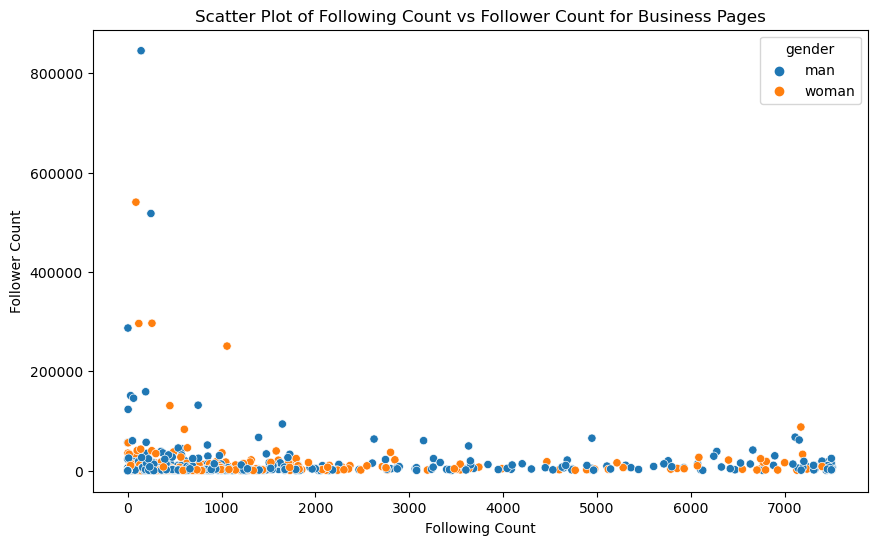

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='following_count', y='follower_count', data=is_bussines,hue='gender')
plt.title('Scatter Plot of Following Count vs Follower Count for Business Pages')
plt.xlabel('Following Count')
plt.ylabel('Follower Count')
plt.show()


This scatterplot shows the relationship between the number of followers ("number_followers") and the number of followers ("number_followers") for two genders (male and female). The analysis of this chart is as follows:

1. **public distribution of data**:
 - Most of the data points are concentrated in the lower left side of the graph, which indicates the low number of followers and the lack of following for most users. This usually means in social networks that most users only follow a small number of pages and have fewer followers themselves.

2. **Errors**:
 - There are several points in the chart that are separated from the rest of the data and are scattered on the top of the chart. These points indicate users or accounts that have a large number of followers. These tips may include popular accounts or promotional pages.

3. **Gender Comparison**:
 - The blue and orange dots, representing men and women respectively, are generally scattered throughout the chart. This scatter diagram shows that males are more distributed than females and there is a significant difference in the number of followers between genders.
 - Of course, in places where the number of followers is very high, both genders are seen, which indicates that gender has a great impact on the amount of followers and becoming followers at high levels.

4. **Focus on the following axes**:
 - Most of the points are concentrated near the lower axis of the graph, which shows that many users have followers and few followers. This state may be due to the normal use of social networks by users.

### Conclusion:
- **Diversity in users**: The graph shows that in social networks, users are very diverse in terms of the number of followers and followers, but the majority of them are concentrated in lower ranges.
- **External Analysis**: More detailed analysis from further points can help identify specific users, such as influencers or business pages.
- **There is a significant gender difference**: In this data sample, a significant difference between genders is observed in the amount of following. The number of business admin pages of men is more than that of women

In [142]:
gender_isbusiness_mean = is_bussines.groupby(['gender']).mean()
gender_isbusiness_mean=gender_isbusiness_mean.iloc[:,:3]

C:\Users\peyman\AppData\Local\Temp\ipykernel_18480\3165039400.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

  gender_isbusiness_mean = is_bussines.groupby(['gender']).mean()


In [143]:
def instagram_business(value, key):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))


    explode = (0.1,) * len(value)

    keys = list(value.index)
    counts = list(value[key])


    axes[0].pie(counts, labels=keys,
                autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * sum(counts) / 100),
                explode=explode)
    axes[0].set_title(f"{key} Distribution (Pie Chart)")


    axes[1].bar(keys, counts)
    for i, count in enumerate(counts):
        axes[1].text(i, count + max(counts) * 0.02, str(round(count*10,2)), ha='center', va='bottom', fontsize=10, color='black')

    axes[1].set_ylim(0, max(counts) * 1.1)
    axes[1].set_title(f"{key} Distribution (Bar Chart)")

    plt.tight_layout()
    plt.savefig('rooms_distribution_chart.png')
    plt.show()


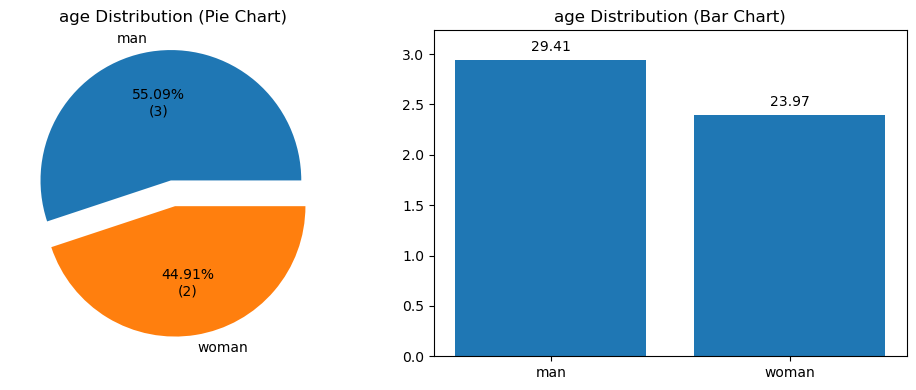

In [144]:
instagram_business(gender_isbusiness_mean,'age')

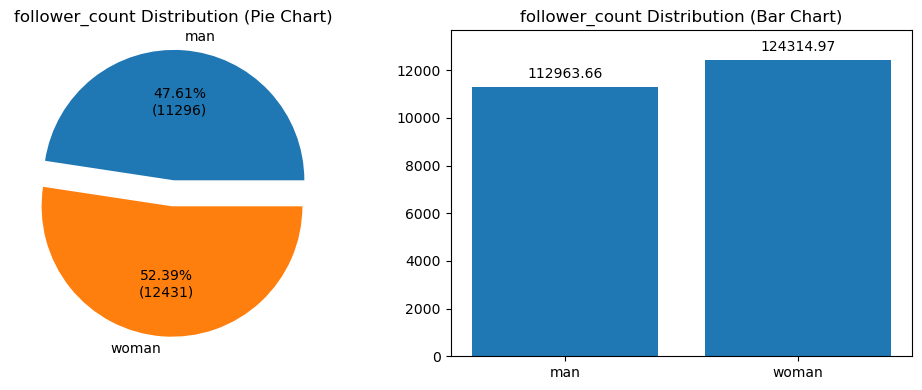

In [145]:
instagram_business(gender_isbusiness_mean,'follower_count')

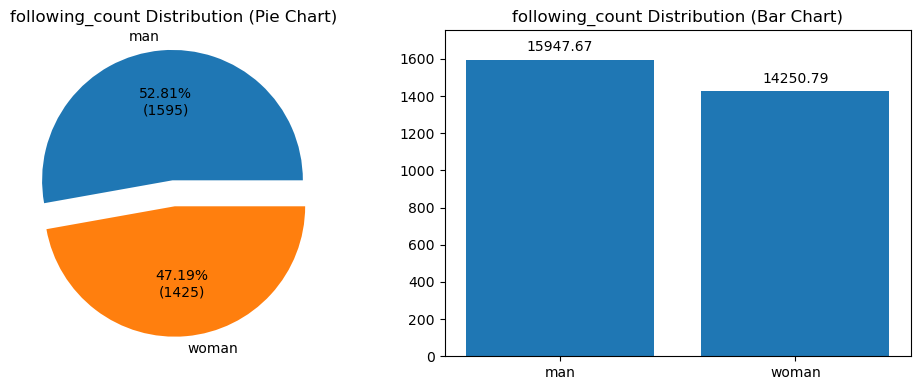

In [146]:
instagram_business(gender_isbusiness_mean,'following_count')

According to the new data as follows:

### Data analysis

#### **1. Average age:**

- **Men:** Average age 29.4
- **Women:** Average age 24.0

**Analysis:**
- Women are on average younger than men. This may indicate that among business accounts, women are more likely to create newer or younger accounts.

#### **2. Number of followers (Follower Count):**

- **Men:** Average number of followers 11,296.37
- **Women:** Average number of followers 12,431.50

**Analysis:**
- Women have more followers on average than men. This suggests that women's business accounts may have more engagement and engagement than men's.

#### **3. Number of followers (Following Count):**

- **Men:** The average number of followers is 1,594.77
- **Women:** The average number of followers is 1,425.08

**Analysis:**
- Men follow more accounts on average than women. This may indicate that men generally interact more with different accounts or do more networking.

### Gender comparison

1. **Age:**
 - Women tend to be younger than men, which could mean that women's business accounts are younger or more recent.

2. **Number of followers:**
 - Women have more followers on average, which could indicate their higher influence or more engaging content.

3. **Number of Followers:**
 - Men follow more accounts on average, which may indicate different strategies in networking and interacting with other accounts.


### Conclusion

- **Age:** Women are younger than men.
- **Number of followers:** Women have more followers than men.
- **Number of Followers:** Men follow other accounts more than women.

In [147]:
gender_isbusiness_max = is_bussines.groupby(['gender']).max()
gender_isbusiness_max=gender_isbusiness_max[['age','follower_count','following_count']]
gender_isbusiness_max['age']=gender_isbusiness_max['age']

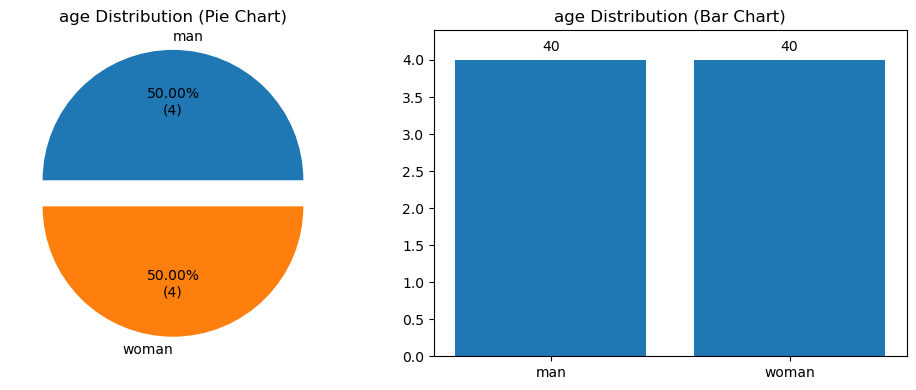

In [148]:
instagram_business(gender_isbusiness_max,'age')

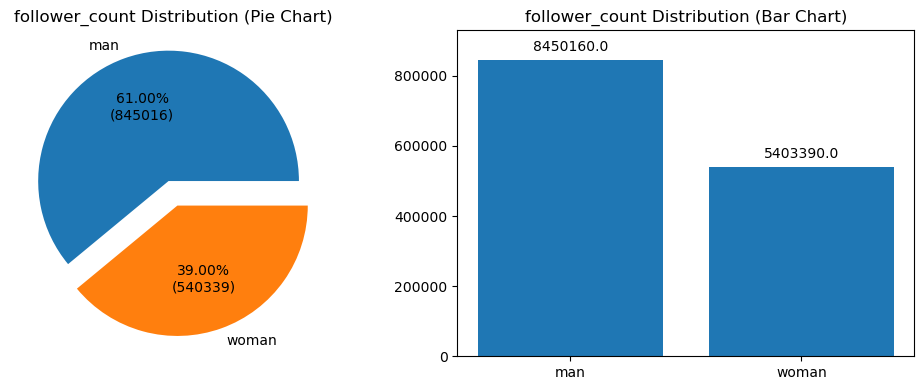

In [149]:
instagram_business(gender_isbusiness_max,'follower_count')

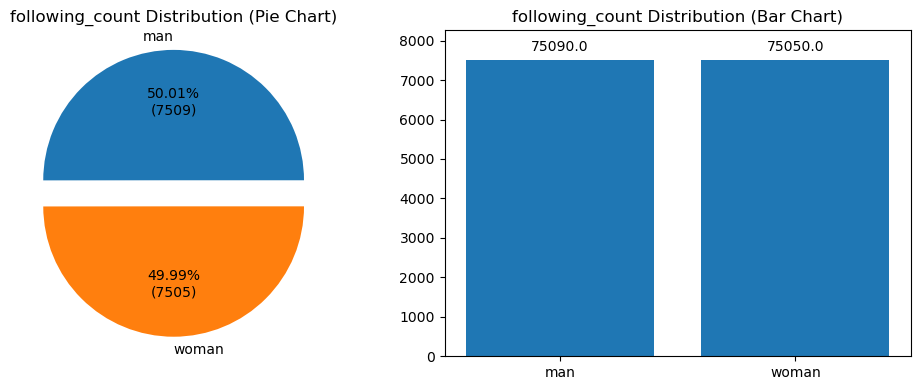

In [150]:
instagram_business(gender_isbusiness_max,'following_count')

According to the new data as follows:

These data show the highest averages at age 40 for business accounts. Here is the analysis of this data:

### Data analysis

#### **1. Number of followers (Follower Count):**

- **Men:** 845,016
- **Women:** 540,339

**Analysis:**
- Male business accounts have significantly more followers than female business accounts. This large difference in follower numbers could mean higher influence or more engaging content on male business accounts. This may indicate that men's accounts have been able to attract a wider range of followers.

#### **2. Number of followers (Following Count):**

- **Men:** 7,509
- **Women:** 7,505

**Analysis:**
- The number of followers for men and women is almost equal. This indicates that male and female business accounts follow a similar number of other accounts and perform equally well in networking.

### Comparison of gender at the greatest age

1. **Number of followers:**
 - Men's business accounts have significantly more followers than women's. This may indicate key differences in follower acquisition strategies or the type of content provided.

2. **Number of Followers:**
 - The number of followers is similar among business accounts of men and women, indicating similar engagement in networking.


### Conclusion

- **Number of Followers:** Men's business accounts have significantly more followers than women's.
- **The number of followers:** The number of followers is almost the same for both sexes.

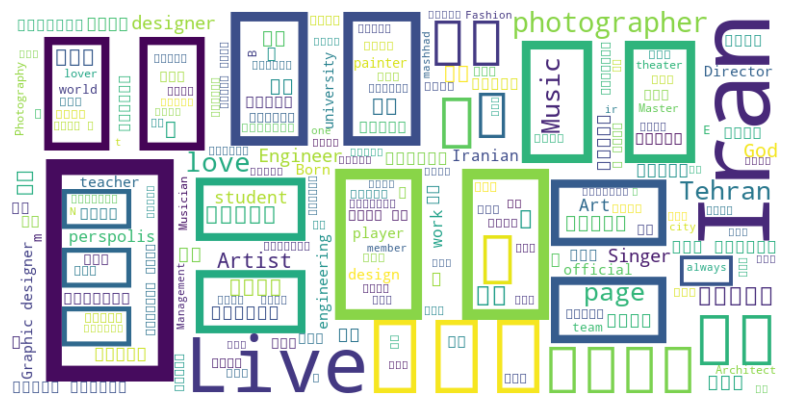

In [151]:
text = " ".join(biography for biography in is_bussines.biography.dropna())
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)


plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h2 align=ltr style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Modeling
</font>
</h2>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 Now that you've cleaned the data and possibly added or removed features, it's time to train a model that can predict the target variable for this problem.
</font>
</p>

In [152]:
def enrich_dataframe(df):
    df['follower_to_following_ratio'] = df['follower_count'] / df['following_count'].replace(0, 1)  
    df['hashtags_count'] = df['biography'].apply(lambda x: x.count('#'))
    df['has_external_links'] = df['biography'].apply(lambda x: 1 if 'http' in x or 'www' in x else 0)
    return df

train = enrich_dataframe(train)
test = enrich_dataframe(test)

In [154]:
test.isna().sum()

age                            0
fullname                       0
username                       0
biography                      0
follower_count                 0
following_count                0
is_business                    0
is_verified                    0
is_private                     0
follower_to_following_ratio    0
hashtags_count                 0
has_external_links             0
dtype: int64

In [155]:
train.isna().sum()

gender                         0
age                            0
fullname                       0
username                       0
biography                      0
follower_count                 0
following_count                0
is_business                    3
is_verified                    0
is_private                     0
follower_to_following_ratio    0
hashtags_count                 0
has_external_links             0
dtype: int64

In [156]:
full_train = [i for i in range(len(train['fullname']))]
full_test = [i for i in range(len(test['fullname']))]

In [157]:
train['fullname_int'] = full_train
train['username_int'] = full_train
train['biography_int'] = full_train

test['fullname_int'] = full_test
test['username_int'] = full_test
test['biography_int'] = full_test

In [158]:
train=train.dropna()

In [161]:
train['gender'] = train['gender'].map({'man': 0, 'woman': 1})

C:\Users\peyman\AppData\Local\Temp\ipykernel_18480\3959561664.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['gender'] = train['gender'].map({'man': 0, 'woman': 1})


In [184]:
X_train = train.drop(columns=['gender','fullname','username','biography'])  
y_train = train['gender']
X_test = test.drop(columns=['fullname','username','biography'], errors='ignore')  
y_test = test['gender'] if 'gender' in test.columns else None

In [214]:
def modeling(X_train,y_train,X_test,num):
    model=RandomForestClassifier(n_estimators=num)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_t = model.predict(X_train)
    return y_pred,y_pred_t
    

In [215]:
y_pred,y_pred_t=modeling(X_train,y_train,X_test,9)

<h3 align=ltr style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Evaluation criteria
</font>
</h3>

<p dir=ltr style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 The criterion we have chosen to evaluate the performance of the model is called <code>f1_score</code>.
 <br>
 This criterion is the measure of evaluating the quality of your model. In other words, the same criterion has been used for scoring in the judging system.
 <br>
 It is suggested to evaluate the performance of your model on training or validation data according to this criterion.
</font>
</p>

In [217]:
def metrics(y_test,y_pred):
    acc=accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    precision = precision_score(y_test, y_pred, average='binary')
    return acc,f1,precision

In [218]:
acc,f1,precision = metrics(y_train, y_pred_t)
print(f"Accuracy:{acc} , F1 Score: {f1} , Precision: {precision}  ")

Accuracy:0.9709891209203452 , F1 Score: 0.9709889975310273 , Precision: 0.9728779507785033  


In [219]:
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support



           0       0.97      0.97      0.97      3999

           1       0.97      0.97      0.97      3998



    accuracy                           0.97      7997

   macro avg       0.97      0.97      0.97      7997

weighted avg       0.97      0.97      0.97      7997




According to the evaluation metrics provided for the Random Forest model with the number of ``n_estimators=9'', the following analyzes can be performed:

### Analysis of metrics

####  **1.** Precision

- **Class 0:** 0.97
- **Class 1:** 0.97

**Analysis:**
- Precision means the ratio of correct positive predictions to total positive predictions. In other words, accuracy indicates what percentage of all positive model predictions were actually correct.
- In this model, the accuracy for both classes is very high (97%). This shows that the model can identify positive samples from both classes well and has few errors in predicting positive samples.

####  **2.** Recall

- **Class 0:** 0.97
- **Class 1:** 0.97

**Analysis:**
- Recall means the ratio of identified positive samples to the total number of real positive samples. In other words, the readout indicates what percentage of true positive samples the model has identified.
- In this model, readability for both classes is also very high (97%). This means that the model was able to identify most of the true positive samples and did not miss a large number of true positive samples.

####  **3.** F1 score (F1-Score)

- **Class 0:** 0.97
- **Class 1:** 0.97

**Analysis:**
- The F1 score is the average agreement between accuracy and readability and is useful for evaluating the model in situations where there is a need for a balance between accuracy and readability. The F1 score is particularly important in cases where the number of positive and negative samples is unequal.
- In this model, the F1 score for both classes is very high (97%), which indicates the balanced and effective performance of the model in identifying positive and negative samples.

####  **4.** Overall accuracy (Accuracy)

- **Overall accuracy:** 0.97

**Analysis:**
- Overall accuracy means the ratio of correctly predicted samples to the total samples. The model has a very high overall accuracy (97%), which indicates that the model performs well in correctly predicting most samples.

#### **5.** Macro and weighted averages

- **Macro Average:** 0.97
- **Weighted Average:** 0.97

**Analysis:**
- Macro Average means the average accuracy, readability and F1 score for each class separately and gives weight to each class uniformly.
- Weighted average means the average accuracy, readability and F1 score for each class, considering the number of samples in each class.
- In this model, both macro and weighted averages are similar and equal to 97%, which indicates the good performance of the model for both classes in general.

### Conclusion

The Random Forest model with the number of ``n_estimators=9'' has performed very well in predicting and identifying samples of both classes:

- **Precision:** is high and indicates the least error in predicting positive samples.
- **Recall:** is high and indicates the ability of the model to identify the majority of real positive samples.
- **Score F1:** Indicates a good balance between accuracy and readability.
- **Overall accuracy (Accuracy):** is high and indicates the excellent performance of the model in correct prediction.

Overall, the model seems to meet your prediction needs well in this setting, with good performance and a good balance in identifying both classes. If you have more questions or need more specific analysis, please let me know!

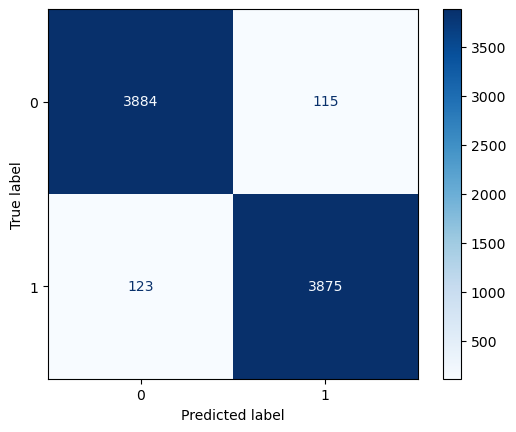

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred_t)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Confusion matrices are very useful for evaluating the performance of classification models. The confusion matrix you provided is as follows:

```
[[3884, 115],
 [123, 3875]]
```

This matrix is ​​for a binary classification model and is analyzed as follows:

### Confusion matrix analysis

#### **Confusion Matrix:**

| | **Prediction of class 0** | **Class 1 prediction** |
|-----------|---------------------|------------- ------ |
| **Real class 0** | 3884 | 115 |
| **Real class 1** | 123 3875 |

#### **Interpretation of matrix values:**

- **True Positives (TP):** Number of positive samples correctly predicted as positive.
 - For class 1: **3875** (correctly predicted as class 1)

- **True Negatives (TN):** Number of negative samples correctly predicted as negative.
 - For class 0: **3884** (correctly predicted as class 0)

- **False Positives (FP):** The number of negative samples that were wrongly predicted as positive.
 - For class 1: **115** (wrongly predicted as class 1)

- **False Negatives (FN):** The number of positive samples that were wrongly predicted as negative.
 - For class 0: **123** (wrongly predicted as class 0)

### Conclusion

- **Precision:** The model has very good accuracy for both classes (97%). This indicates that a large percentage of all positive predictions were correct.

- **Recall:** Model recall for both classes is also high (97%). This indicates that the model has been able to identify most of the positive samples.

- **F1-Score:** The F1 score for both classes is equally high (97%), which means a good balance between accuracy and readability.

- **Overall accuracy (Accuracy):** The overall accuracy of the model is also high (97%), which indicates the strong performance of the model in correct prediction for most of the samples.

This analysis shows the very good performance of your model in classifying samples. The model is able to accurately predict and identify most of the samples correctly, and its errors are very few.

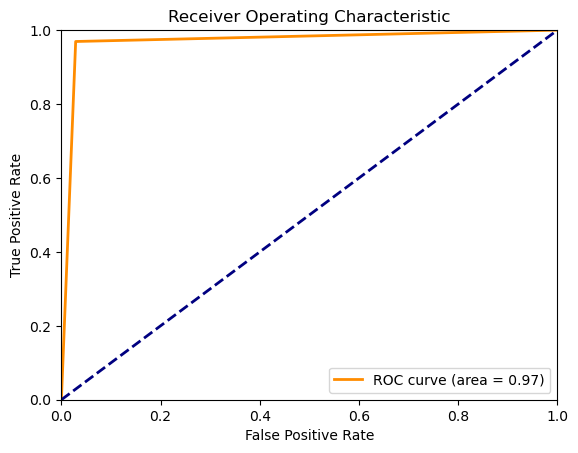

In [195]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, y_pred_t)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### ROC curve analysis

- **close to the top left corner:** ROC curve should be close to the top left corner, indicating good model performance (ie high TPR and low FPR).
- **Area Under the Curve (AUC):** The AUC (Area Under the Curve) value indicates the overall performance of the model. An AUC value close to 1 indicates excellent performance, while a value close to 0.5 indicates random performance.

### Conclusion

According to the values ​​provided:

- Your model seems to perform well at high TPR values ​​and low FPR values.
- The ROC curve can help you see how the model performs against different thresholds and help you choose the best threshold to balance between TPR and FPR.

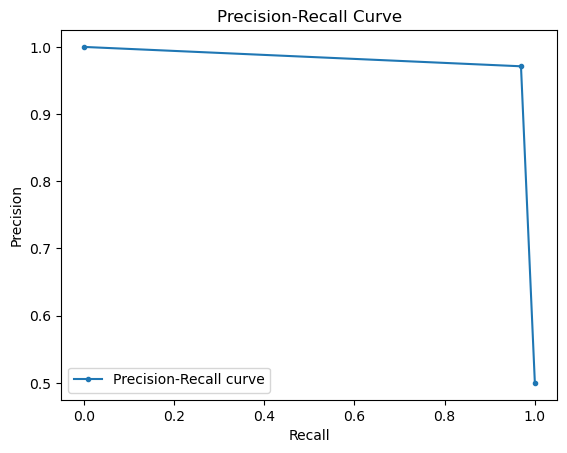

In [196]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, y_pred_t)

plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


<h3 align=ltr style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
📳 Suggesting specific strategies to increase sales and followers
</font>
</h3>

According to the above data, specific strategies can be designed to increase followers, visits and sales on business pages. Here I analyze the data and make strategic recommendations:

### Data analysis

#### **1. Follower and following analysis:**
- **For pages with the highest number of followers:**
 - **Men:** The average follower is 845,016 and the average following is 7,509
 - **Women:** average follower 540,339 and average following 7,505

- **For pages with the lowest number of followers:**
 - **Men:** 0 followers and 0 followings
 - **Women:** 0 followers and 0 followings

- **For pages that are 20 years old:**
 - **Men:** The average follower is 11,296 and the average following is 1,595
 - **Women:** average follower 12,432 and average following 1,425

### Suggested strategies to increase followers, visits and sales

#### **1. **increase followers**

- **For novice pages (10 years old) with zero followers and followings:**
 - **Attractive content:** Creating unique and attractive content that attracts the attention of users. Using videos, quality images and educational content.
 - **Targeted advertising:** Launching ads on social networks to attract new followers. Targeting based on the interests and behaviors of users can help your page to be introduced to the right audience.
 - **Collaboration with influencers:** Using influencers and bloggers to promote your page and draw attention to new accounts.
 - **Holding contests and raffles:** Creating incentives for users to follow your page through prizes and special gifts.

- **For pages with the most followers (845,016 for men and 540,339 for women):**
 - **Content and Engagement:** Maintain and enhance engagement with followers by quickly responding to comments, polls, and interactive stories.
 - **Holding events:** Holding online events and webinars to maintain and attract new followers.
 - **Using data:** Analyzing follower and following data to identify successful patterns and optimize strategies.

#### **2. **Increase visits**

- **Attractive and regular content:** Production of quality and up-to-date content that answers users' questions and needs. Providing educational, news and entertaining content can increase traffic.
- **Using related hashtags:** Using popular hashtags related to your content to increase the visibility of posts.
- **Advertising and Promotion:** Investing in advertising to draw attention to new content and increase visits.

#### **3. **increase sales**

- **Discounts and special offers:** Providing special discounts and limited offers to encourage users to buy.
- **Using CTA (call to action):** Using call to action buttons and links in posts and stories to direct users to the purchase page.
- **Optimizing user experience:** Ensuring that the online shopping process is simple and hassle-free, so that users can shop easily.

### Conclusion

For new pages:
- **Focus on attracting followers:** Using advertisements, collaborating with influencers and holding contests.
- **Focus on interaction:** Creating attractive content and responding to users.

For pages with a large number of followers:
- **Maintain engagement and more engagement:** Using engagement strategies and providing valuable content.
- **Data analysis:** To optimize visit and sales strategies.

These strategies can help you increase followers, visits and sales and lead to the improvement of the performance of your business pages.